# Group-12 Car Price Prediction
* **V.V.S.N.SAI MOHAN**
* **B.JAGADANANDA THARAKA**
* **M.VISHAL REDDY**
* **K.NAVEEN KUMAR**
* **S.MANIKANTA KUMAR**

**In this Project, we are going to predict the Price of Used Cars using various features like Car_name, year, selling_price, present_price, Kms_driven, fuel_type, seller_type, transmission, owner etc. The data used in this project was downloaded from Kaggle.**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import ExtraTreesRegressor

## Loading Data (1st dataset)

### 1. Data Summarization

In [2]:
df=pd.read_csv('data1.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### 2. Data Pre-Processing

In [5]:
df.isnull().sum()
# No null values in raw data.

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### * Drop features that are not required to build our model *

In [6]:
data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

# In Car_Name column there are 26 duplicate 'city' names and other names.

In [7]:
data['Current_Year']=2021  
# Adding Age column to find age and removing the year column for easy use.

In [8]:
data['Age']=data['Current_Year']-data['Year']
data.drop(['Current_Year'],axis=1,inplace=True)
data.drop(['Year'],axis=1,inplace=True)

In [9]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### 3. Data Visualization

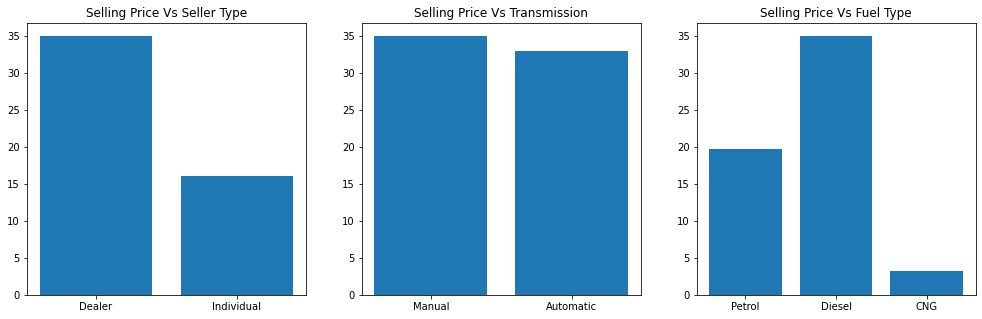

In [12]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
plt.bar(data['Seller_Type'], data['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
plt.bar(data['Transmission'],data['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
plt.bar(data['Fuel_Type'],data['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

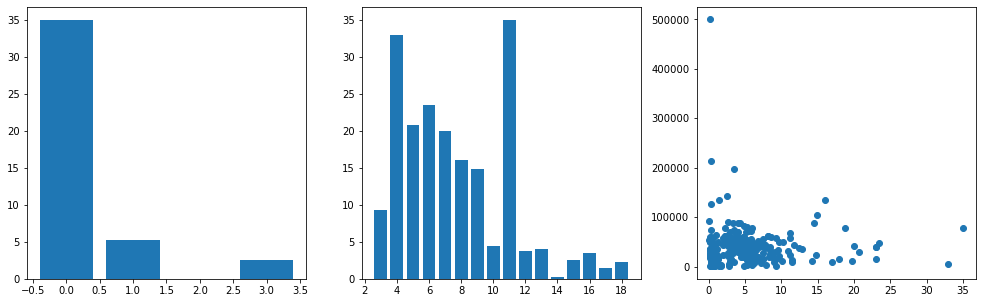

In [16]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
plt.bar(data['Owner'],data['Selling_Price'])

plt.subplot(1,3,2)
plt.bar(data['Age'],data['Selling_Price'])

plt.subplot(1,3,3)
plt.scatter(data['Selling_Price'],data['Kms_Driven'])
plt.show()

C:\Users\91938\AppData\Local\Temp\ipykernel_17720\3294172761.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(data['Selling_Price']))
C:\Users\91938\AppData\Local\Temp\ipykernel_17720\3294172761.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(data['Kms_Driven']))


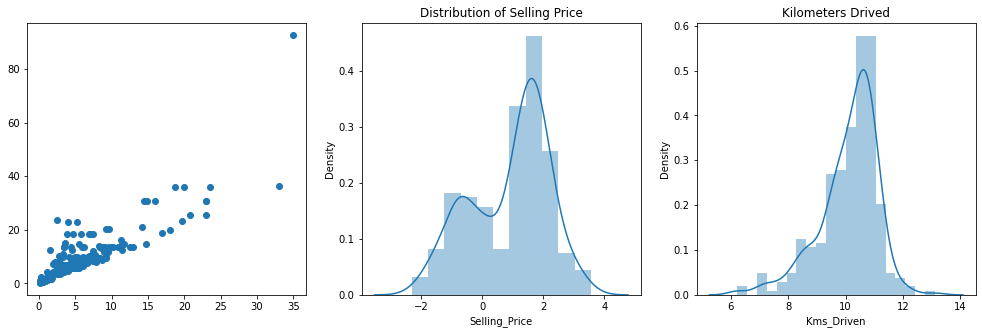

In [18]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
plt.scatter(data['Selling_Price'],data['Present_Price'])

plt.subplot(1,3,2)
sb.distplot(np.log(data['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sb.distplot(np.log(data['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

### 4. Data Interpretation

In [ ]:
data.to_csv('cleaned_data1.csv',index=False)